# Time Series

# Time Series Practice with LSTM

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense, LSTM

In [2]:
data_train = pd.read_csv('/content/DailyDelhiClimateTrain.csv')
data_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
data_train.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

Text(0.5, 1.0, 'Temperature Average')

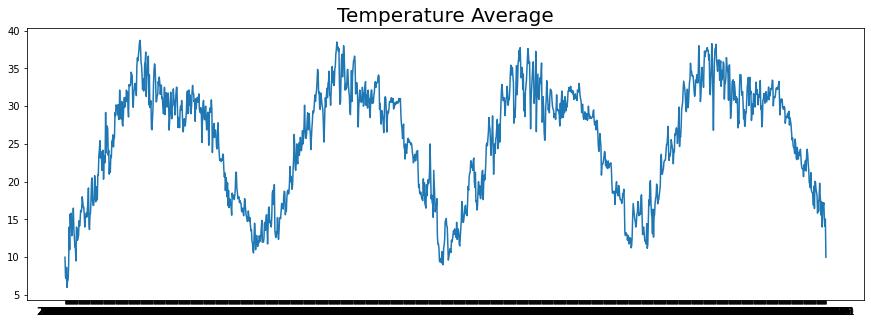

In [4]:
dates = data_train['date'].values
temp = data_train['meantemp'].values

plt.figure(figsize=(15, 5))
plt.plot(dates, temp)
plt.title('Temperature Average', fontsize=20)

In [5]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [6]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.LSTM(60, return_sequences=True),
                                    tf.keras.layers.LSTM(60),
                                    tf.keras.layers.Dense(30, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='relu'),
                                    tf.keras.layers.Dense(1),
])

In [7]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=['mae'])

history = model.fit(train_set, epochs=100)

Epoch 1/100
15/15 [==============================] - 9s 15ms/step - loss: 25.7294 - mae: 26.2294
Epoch 2/100
15/15 [==============================] - 0s 11ms/step - loss: 25.3619 - mae: 25.8619
Epoch 3/100
15/15 [==============================] - 0s 12ms/step - loss: 25.0852 - mae: 25.5852
Epoch 4/100
15/15 [==============================] - 0s 12ms/step - loss: 24.8536 - mae: 25.3536
Epoch 5/100
15/15 [==============================] - 0s 11ms/step - loss: 24.6321 - mae: 25.1321
Epoch 6/100
15/15 [==============================] - 0s 11ms/step - loss: 24.3989 - mae: 24.8989
Epoch 7/100
15/15 [==============================] - 0s 11ms/step - loss: 24.1466 - mae: 24.6466
Epoch 8/100
15/15 [==============================] - 0s 12ms/step - loss: 23.8612 - mae: 24.3612
Epoch 9/100
15/15 [==============================] - 0s 11ms/step - loss: 23.5021 - mae: 24.0021
Epoch 10/100
15/15 [==============================] - 0s 11ms/step - loss: 23.0670 - mae: 23.5670
Epoch 11/100
15/15 [=========